<a href="https://colab.research.google.com/github/matlarakshan/Vehicle_Insurance/blob/main/Vehicle_Insurance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#importing libraries
import warnings
warnings.filterwarnings('ignore')
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
#To read the uploaded train files
df = pd. read_csv("/content/train-Health Insurance Cross Sell Prediction.csv")

In [ ]:
df.head()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,2,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,3,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,4,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,5,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0


In [ ]:
df.tail()

,id,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
56837,56838,Male,42,1,5.0,0,1-2 Year,No,22330.0,124.0,93,0
56838,56839,Male,30,1,41.0,1,< 1 Year,No,36904.0,152.0,154,0
56839,56840,Female,49,1,28.0,1,1-2 Year,No,48016.0,26.0,251,0
56840,56841,Female,23,1,35.0,1,< 1 Year,No,35697.0,152.0,129,0
56841,56842,Male,21,1,15.0,1,< 1 Year,No,36876.0,160.0,11,0


In [ ]:
df.shape

(56842, 12)

In [ ]:
df.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,56842.000000,56842.000000,56842.000000,56842.000000,56842.000000,56842.000000,56842.000000,56842.000000,56842.000000
mean,28421.500000,38.766546,0.997783,26.407586,0.458446,30537.745646,112.432884,154.272862,0.122937
std,16409.016338,15.505450,0.047030,13.188777,0.498275,17123.414502,54.018987,83.715704,0.328368
min,1.000000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,14211.250000,25.000000,1.000000,15.000000,0.000000,24373.000000,30.000000,82.000000,0.000000
50%,28421.500000,36.000000,1.000000,28.000000,0.000000,31706.000000,150.000000,154.000000,0.000000
75%,42631.750000,49.000000,1.000000,35.000000,1.000000,39532.750000,152.000000,227.000000,0.000000
max,56842.000000,85.000000,1.000000,52.000000,1.000000,540165.000000,163.000000,299.000000,1.000000


In [ ]:
df.describe(include=["object"])

,Gender,Vehicle_Age,Vehicle_Damage
count,56842,56842,56842
unique,2,3,2
top,Male,1-2 Year,Yes
freq,30619,29782,28700


In [ ]:
df.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
Response                0
dtype: int64

In [ ]:
df.dtypes

id                        int64
Gender                   object
Age                       int64
Driving_License           int64
Region_Code             float64
Previously_Insured        int64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                   int64
Response                  int64
dtype: object

In [ ]:
df.nunique()

id                      56842
Gender                      2
Age                        66
Driving_License             2
Region_Code                53
Previously_Insured          2
Vehicle_Age                 3
Vehicle_Damage              2
Annual_Premium          25848
Policy_Sales_Channel      127
Vintage                   290
Response                    2
dtype: int64

In [ ]:
#Dropping unwanted data
df.drop(['id'], axis=1, inplace=True)

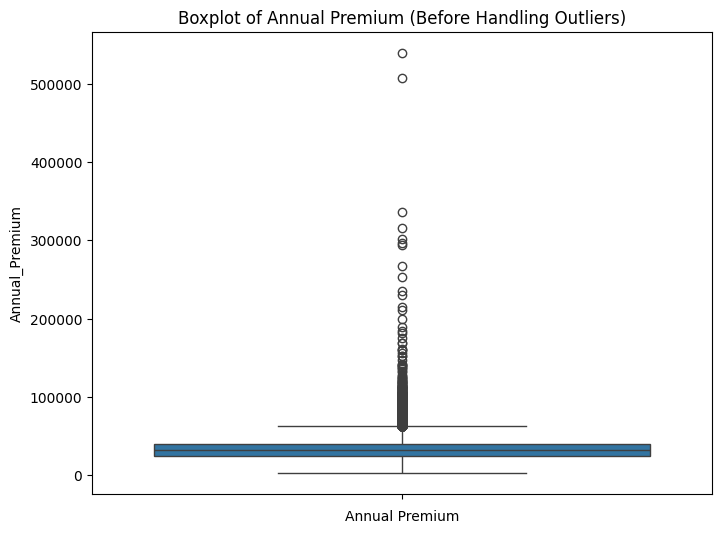

In [ ]:
# Before handling outliers
plt.figure(figsize=(8, 6))
sns.boxplot(df["Annual_Premium"])
plt.title("Boxplot of Annual Premium (Before Handling Outliers)")
plt.xlabel("Annual Premium")
plt.show()

In [ ]:
# Handling outliers by replacing with median
median_premium = df["Annual_Premium"].median()
df["Annual_Premium"] = df["Annual_Premium"].apply(lambda x: median_premium if x > 1.5 * median_premium else x)

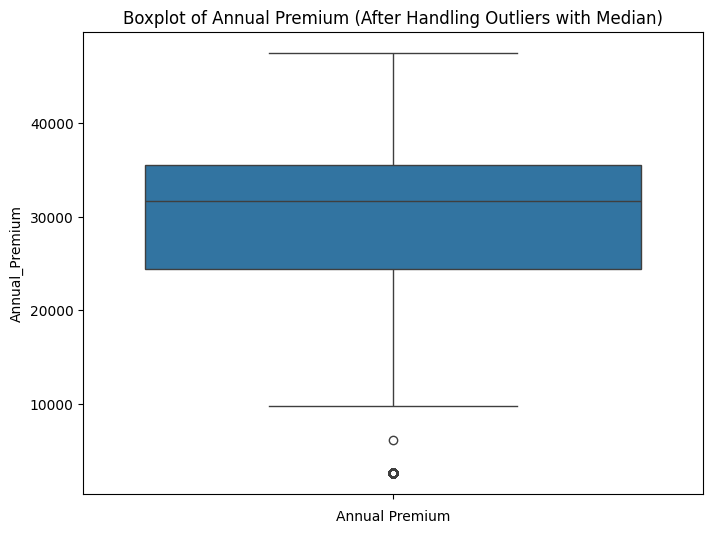

In [ ]:
# After handling outliers
plt.figure(figsize=(8, 6))
sns.boxplot(df["Annual_Premium"])
plt.title("Boxplot of Annual Premium (After Handling Outliers with Median)")
plt.xlabel("Annual Premium")
plt.show()

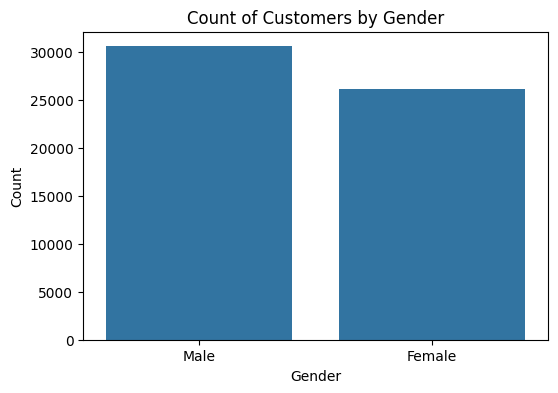

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x="Gender", data=df)
plt.title("Count of Customers by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

<Axes: ylabel='Frequency'>

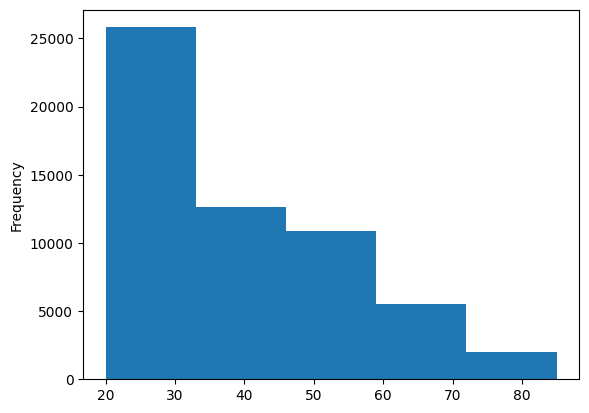

In [ ]:
# Histogram on Numeric data of Age
df['Age'].plot(kind='hist',bins=5)

<Axes: xlabel='Age', ylabel='Density'>

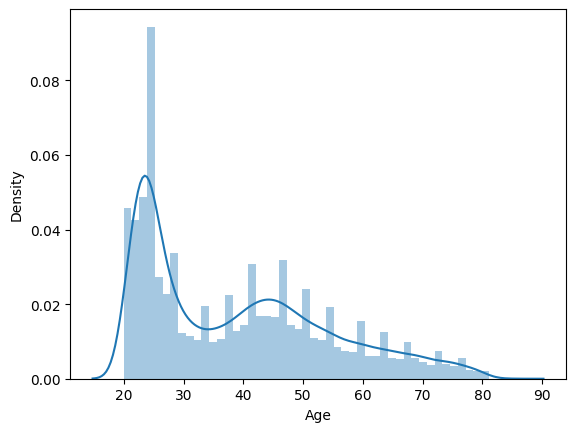

In [ ]:
# Distplot
sns.distplot(df['Age'])

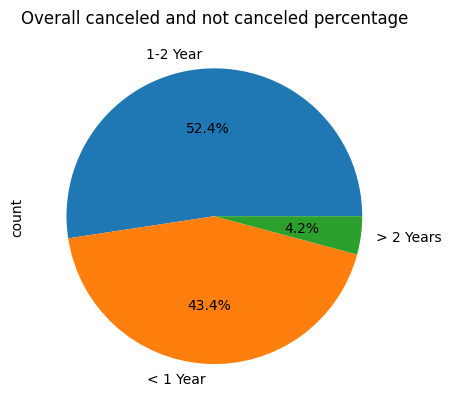

In [ ]:
df['Vehicle_Age'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Overall canceled and not canceled percentage')
plt.show()

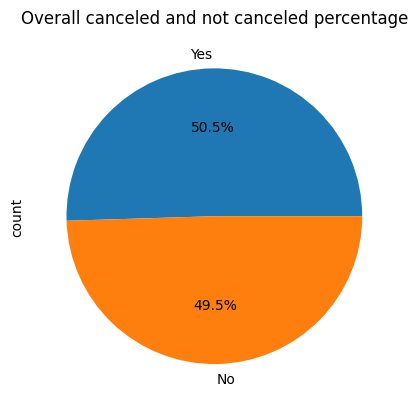

In [ ]:
df['Vehicle_Damage'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Overall canceled and not canceled percentage')
plt.show()

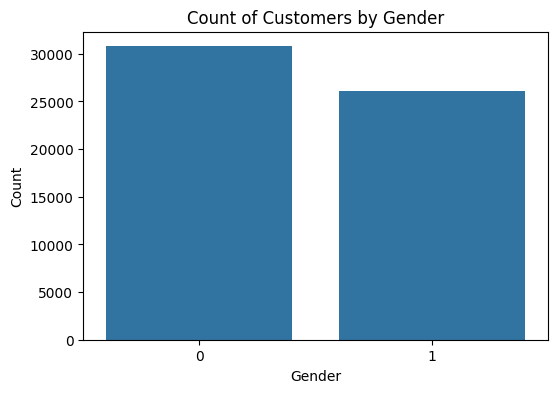

In [ ]:
plt.figure(figsize=(6, 4))
sns.countplot(x="Previously_Insured", data=df)
plt.title("Count of Customers by Gender")
plt.xlabel("Gender")
plt.ylabel("Count")
plt.show()

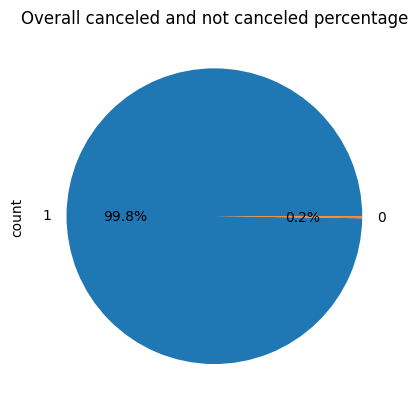

In [ ]:
df['Driving_License'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Overall canceled and not canceled percentage')
plt.show()

In [ ]:
#plt.figure(figsize=(10, 8))
#sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
#plt.title("Correlation Heatmap")
#plt.show()

A value like "1.8e-06" is scientific notation and represents a very small number. Specifically, "1.8e-06" is equal to
1.8×10^−6

1 indicates a perfect positive correlation,

−1 indicates a perfect negative correlation,

0 indicates no correlation.

Therefore, a value like "1.8e-06" close to zero indicates that there is almost no linear relationship between the two variables.



There are 3 non-numeric columns in a DataFrame:

Gender

Vehicle_Age

Vehicle_Damage

In [ ]:
df

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,Male,44,1,28.0,0,> 2 Years,Yes,40454.0,26.0,217,1
1,Male,76,1,3.0,0,1-2 Year,No,33536.0,26.0,183,0
2,Male,47,1,28.0,0,> 2 Years,Yes,38294.0,26.0,27,1
3,Male,21,1,11.0,1,< 1 Year,No,28619.0,152.0,203,0
4,Female,29,1,41.0,1,< 1 Year,No,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...
56837,Male,42,1,5.0,0,1-2 Year,No,22330.0,124.0,93,0
56838,Male,30,1,41.0,1,< 1 Year,No,36904.0,152.0,154,0
56839,Female,49,1,28.0,1,1-2 Year,No,31706.0,26.0,251,0
56840,Female,23,1,35.0,1,< 1 Year,No,35697.0,152.0,129,0


In [ ]:
df.Gender.replace({'Male':1,'Female':2}, inplace=True)
df.Vehicle_Damage.replace({'Yes':1,'No':0}, inplace=True)
df.Vehicle_Age.replace({'< 1 Year':1,'1-2 Year':2,'> 2 Years':3}, inplace=True)

In [ ]:
df

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,44,1,28.0,0,3,1,40454.0,26.0,217,1
1,1,76,1,3.0,0,2,0,33536.0,26.0,183,0
2,1,47,1,28.0,0,3,1,38294.0,26.0,27,1
3,1,21,1,11.0,1,1,0,28619.0,152.0,203,0
4,2,29,1,41.0,1,1,0,27496.0,152.0,39,0
...,...,...,...,...,...,...,...,...,...,...,...
56837,1,42,1,5.0,0,2,0,22330.0,124.0,93,0
56838,1,30,1,41.0,1,1,0,36904.0,152.0,154,0
56839,2,49,1,28.0,1,2,0,31706.0,26.0,251,0
56840,2,23,1,35.0,1,1,0,35697.0,152.0,129,0


In [ ]:
df.describe()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
count,56842.000000,56842.000000,56842.000000,56842.000000,56842.000000,56842.000000,56842.000000,56842.000000,56842.000000,56842.000000,56842.000000
mean,1.461331,38.766546,0.997783,26.407586,0.458446,1.607403,0.504908,27547.847085,112.432884,154.272862,0.122937
std,0.498507,15.505450,0.047030,13.188777,0.498275,0.567388,0.499980,12784.377110,54.018987,83.715704,0.328368
min,1.000000,20.000000,0.000000,0.000000,0.000000,1.000000,0.000000,2630.000000,1.000000,10.000000,0.000000
25%,1.000000,25.000000,1.000000,15.000000,0.000000,1.000000,0.000000,24373.000000,30.000000,82.000000,0.000000
50%,1.000000,36.000000,1.000000,28.000000,0.000000,2.000000,1.000000,31706.000000,150.000000,154.000000,0.000000
75%,2.000000,49.000000,1.000000,35.000000,1.000000,2.000000,1.000000,35545.000000,152.000000,227.000000,0.000000
max,2.000000,85.000000,1.000000,52.000000,1.000000,3.000000,1.000000,47559.000000,163.000000,299.000000,1.000000


In [ ]:
# Splliting up of data
X = df.drop(["Response"], axis = 1)

In [ ]:
y = df[["Response"]]

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [ ]:
# Scaling your data
from sklearn.preprocessing import StandardScaler

num_cols = X_train.select_dtypes(include=['float64', 'int64']).columns

In [ ]:
scaler = StandardScaler()
scaler.fit(X_train[num_cols])

StandardScaler()

In [ ]:
X_train_std = scaler.transform(X_train[num_cols])
X_test_std = scaler.transform(X_test[num_cols])

In [ ]:
print(X_train_std.shape)
print(X_test_std.shape)

(45473, 10)
(11369, 10)


In [ ]:
print(X.shape, y.shape)

(56842, 10) (56842, 1)


In [ ]:
# Print the shapes of the training and testing sets
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((45473, 10), (11369, 10), (45473, 1), (11369, 1))

In [ ]:
y_train.value_counts()

Response
0           39876
1            5597
Name: count, dtype: int64

In [ ]:
y_train.value_counts(normalize=True)*100

Response
0           87.691597
1           12.308403
Name: proportion, dtype: float64

In [ ]:
y_test.value_counts(normalize=True)*100

Response
0           87.764975
1           12.235025
Name: proportion, dtype: float64

In [ ]:
def evaluate_model(act, pred):
    from sklearn.metrics import confusion_matrix,classification_report, accuracy_score, recall_score, precision_score, f1_score
    print("Confusion Matrix \n", confusion_matrix(act, pred))
    print(classification_report(act,pred))
    print("Accurcay : ", accuracy_score(act, pred))
    print("Recall   : ", recall_score(act, pred,average='weighted'))
    print("Precision: ", precision_score(act, pred, average='weighted'))
    print("F1_score : ", f1_score(act, pred, average='weighted'))

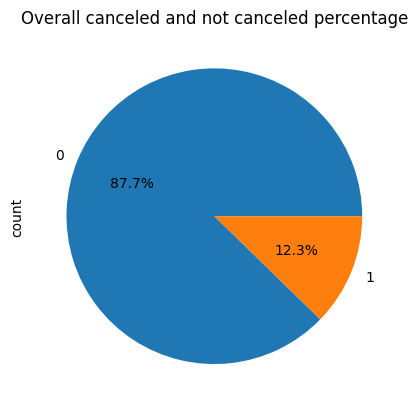

In [ ]:
df['Response'].value_counts().plot.pie(autopct='%1.1f%%')
plt.title('Overall canceled and not canceled percentage')
plt.show()

UpSampling

In [ ]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=123)
X_train_sm, y_train_sm = smote.fit_resample(X_train, y_train)

In [ ]:
np.unique(y_train, return_counts= True)
np.unique(y_train_sm, return_counts= True)

(array([0, 1]), array([39876, 39876]))

In [ ]:
# ML Model - 1 Implementation
from sklearn.linear_model import LogisticRegression
m1 = LogisticRegression()

# Fit the Algorithm
m1.fit(X_train, y_train)

# Predict on the model
train_pred_lr = m1.predict(X_train)
test_pred_lr = m1.predict(X_test)

In [ ]:
# Visualizing evaluation Metric Score chart
print("--Train--")
evaluate_model(y_train, train_pred_lr)
print("--Test--")
evaluate_model(y_test, test_pred_lr)

--Train--
Confusion Matrix 
 [[39876     0]
 [ 5597     0]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.93     39876
           1       0.00      0.00      0.00      5597

    accuracy                           0.88     45473
   macro avg       0.44      0.50      0.47     45473
weighted avg       0.77      0.88      0.82     45473

Accurcay :  0.8769159721153211
Recall   :  0.8769159721153211
Precision:  0.7689816221509588
F1_score :  0.8194097483056755
--Test--
Confusion Matrix 
 [[9978    0]
 [1391    0]]
              precision    recall  f1-score   support

           0       0.88      1.00      0.93      9978
           1       0.00      0.00      0.00      1391

    accuracy                           0.88     11369
   macro avg       0.44      0.50      0.47     11369
weighted avg       0.77      0.88      0.82     11369

Accurcay :  0.8776497493183217
Recall   :  0.8776497493183217
Precision:  0.7702690824785129
F1_score :  0.

In [ ]:
# ML Model - 1 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
m2 = LogisticRegression(solver='saga',penalty='l2', max_iter=1000)

# Fit the Algorithm
m2.fit(X_train_sm, y_train_sm)

# Predict on the model
train_pred_lr_hp = m2.predict(X_train)
test_pred_lr_hp = m2.predict(X_test)

In [ ]:
# Visualizing evaluation Metric Score chart
print("--Train--")
evaluate_model(y_train, train_pred_lr_hp)
print("--Test--")
evaluate_model(y_test, test_pred_lr_hp)

--Train--
Confusion Matrix 
 [[25834 14042]
 [ 2756  2841]]
              precision    recall  f1-score   support

           0       0.90      0.65      0.75     39876
           1       0.17      0.51      0.25      5597

    accuracy                           0.63     45473
   macro avg       0.54      0.58      0.50     45473
weighted avg       0.81      0.63      0.69     45473

Accurcay :  0.6305939788445891
Recall   :  0.6305939788445891
Precision:  0.8130956643281614
F1_score :  0.6928768167044412
--Test--
Confusion Matrix 
 [[6452 3526]
 [ 659  732]]
              precision    recall  f1-score   support

           0       0.91      0.65      0.76      9978
           1       0.17      0.53      0.26      1391

    accuracy                           0.63     11369
   macro avg       0.54      0.59      0.51     11369
weighted avg       0.82      0.63      0.69     11369

Accurcay :  0.6318937461518164
Recall   :  0.6318937461518164
Precision:  0.8173484696563902
F1_score :  0.

In [ ]:
# ML Model - 3 Implementation
from sklearn.ensemble import RandomForestClassifier
m3 = RandomForestClassifier()

# Fit the Algorithm
m3.fit(X_train, y_train)

# Predict on the model
train_pred_rf = m3.predict(X_train)
test_pred_rf = m3.predict(X_test)

In [ ]:
# Visualizing evaluation Metric Score chart
print("--Train--")
evaluate_model(y_train, train_pred_rf)
print("--Test--")
evaluate_model(y_test, test_pred_rf)

--Train--
Confusion Matrix 
 [[39873     3]
 [    7  5590]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     39876
           1       1.00      1.00      1.00      5597

    accuracy                           1.00     45473
   macro avg       1.00      1.00      1.00     45473
weighted avg       1.00      1.00      1.00     45473

Accurcay :  0.9997800892837508
Recall   :  0.9997800892837508
Precision:  0.9997800575411179
F1_score :  0.9997800554934737
--Test--
Confusion Matrix 
 [[9689  289]
 [1215  176]]
              precision    recall  f1-score   support

           0       0.89      0.97      0.93      9978
           1       0.38      0.13      0.19      1391

    accuracy                           0.87     11369
   macro avg       0.63      0.55      0.56     11369
weighted avg       0.83      0.87      0.84     11369

Accurcay :  0.8677104406720029
Recall   :  0.8677104406720029
Precision:  0.8261647834309079
F1_score :  0.

In [ ]:
param_grid = {"n_estimators" : [100,300,700],
              "max_depth" : [3,5,7,11],
              "max_features" : [3,5,7,9],
              "min_samples_leaf" : [2,4,6]}

In [ ]:
#Returning the best combination of parameters
#specifing the no.of folds
#m4 = RandomForestClassifier()
#from sklearn.model_selection import GridSearchCV
#m4 = GridSearchCV(m4,param_grid,cv=5)
#m4.fit(X_train,y_train)

In [ ]:
#m4.best_params_

In [ ]:
# ML Model - 4 Implementation with hyperparameter optimization techniques (i.e., GridSearch CV, RandomSearch CV, Bayesian Optimization etc.)
m4 = RandomForestClassifier(max_depth=11, n_estimators=100, max_features=9, min_samples_leaf=2)

# Fit the Algorithm
m4.fit(X_train_sm, y_train_sm)

# Predict on the model
train_pred_rf_hp = m4.predict(X_train_sm)
test_pred_rf_hp = m4.predict(X_test)

In [ ]:
# Visualizing evaluation Metric Score chart
print("--Train--")
evaluate_model(y_train_sm, train_pred_rf_hp)
print("--Test--")
evaluate_model(y_test, test_pred_rf_hp)

--Train--
Confusion Matrix 
 [[31713  8163]
 [ 2549 37327]]
              precision    recall  f1-score   support

           0       0.93      0.80      0.86     39876
           1       0.82      0.94      0.87     39876

    accuracy                           0.87     79752
   macro avg       0.87      0.87      0.87     79752
weighted avg       0.87      0.87      0.87     79752

Accurcay :  0.8656836192195807
Recall   :  0.8656836192195807
Precision:  0.8730783382225539
F1_score :  0.865014739544492
--Test--
Confusion Matrix 
 [[7892 2086]
 [ 459  932]]
              precision    recall  f1-score   support

           0       0.95      0.79      0.86      9978
           1       0.31      0.67      0.42      1391

    accuracy                           0.78     11369
   macro avg       0.63      0.73      0.64     11369
weighted avg       0.87      0.78      0.81     11369

Accurcay :  0.7761456592488345
Recall   :  0.7761456592488345
Precision:  0.8671945110139205
F1_score :  0.8

In [ ]:
# ML Model - 5 Implementation
from sklearn.tree import DecisionTreeClassifier
m5 = DecisionTreeClassifier()
m5.fit(X_train,y_train)

train_pred_dt = m5.predict(X_train)
test_pred_dt = m5.predict(X_test)

In [ ]:
# Visualizing evaluation Metric Score chart
print("--Train--")
evaluate_model(y_train, train_pred_dt)
print("--Test--")
evaluate_model(y_test, test_pred_dt)

--Train--
Confusion Matrix 
 [[39876     0]
 [    9  5588]]
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     39876
           1       1.00      1.00      1.00      5597

    accuracy                           1.00     45473
   macro avg       1.00      1.00      1.00     45473
weighted avg       1.00      1.00      1.00     45473

Accurcay :  0.9998020803553758
Recall   :  0.9998020803553758
Precision:  0.9998021250156941
F1_score :  0.9998020118937848
--Test--
Confusion Matrix 
 [[8906 1072]
 [ 938  453]]
              precision    recall  f1-score   support

           0       0.90      0.89      0.90      9978
           1       0.30      0.33      0.31      1391

    accuracy                           0.82     11369
   macro avg       0.60      0.61      0.60     11369
weighted avg       0.83      0.82      0.83     11369

Accurcay :  0.823203447972557
Recall   :  0.823203447972557
Precision:  0.8303656454394797
F1_score :  0.82

In [ ]:
#To read the uploaded test files
test = pd. read_csv("/content/test-Health Insurance Cross Sell Prediction.csv")

In [ ]:
test.describe()

,id,Age,Driving_License,Region_Code,Previously_Insured,Annual_Premium,Policy_Sales_Channel,Vintage
count,57680.0000,57679.000000,57679.000000,57679.000000,57679.000000,57679.000000,57679.000000,57679.000000
mean,409949.5000,38.834845,0.998318,26.508140,0.460185,30492.307148,111.805492,154.197576
std,16650.9261,15.495716,0.040975,13.224423,0.498417,16908.236701,54.325460,83.690976
min,381110.0000,20.000000,0.000000,0.000000,0.000000,2630.000000,1.000000,10.000000
25%,395529.7500,25.000000,1.000000,15.000000,0.000000,24257.000000,26.000000,82.000000
50%,409949.5000,36.000000,1.000000,28.000000,0.000000,31619.000000,129.000000,154.000000
75%,424369.2500,49.000000,1.000000,35.500000,1.000000,39370.000000,152.000000,227.000000
max,438789.0000,85.000000,1.000000,52.000000,1.000000,340439.000000,163.000000,299.000000


In [ ]:
test.describe(include=["object"])

,Gender,Vehicle_Age,Vehicle_Damage
count,57680,57679,57679
unique,3,3,2
top,Male,1-2 Year,Yes
freq,30923,30362,28992


In [ ]:
test.isnull().sum()

id                      0
Gender                  0
Age                     1
Driving_License         1
Region_Code             1
Previously_Insured      1
Vehicle_Age             1
Vehicle_Damage          1
Annual_Premium          1
Policy_Sales_Channel    1
Vintage                 1
dtype: int64

In [ ]:
test.dropna(inplace = True)

In [ ]:
test.isnull().sum()

id                      0
Gender                  0
Age                     0
Driving_License         0
Region_Code             0
Previously_Insured      0
Vehicle_Age             0
Vehicle_Damage          0
Annual_Premium          0
Policy_Sales_Channel    0
Vintage                 0
dtype: int64

In [ ]:
a = test['id']

In [ ]:
test.drop(['id'], axis=1, inplace=True)

In [ ]:
test.dtypes

Gender                   object
Age                     float64
Driving_License         float64
Region_Code             float64
Previously_Insured      float64
Vehicle_Age              object
Vehicle_Damage           object
Annual_Premium          float64
Policy_Sales_Channel    float64
Vintage                 float64
dtype: object

In [ ]:
test

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,Male,25.0,1.0,11.0,1.0,< 1 Year,No,35786.0,152.0,53.0
1,Male,40.0,1.0,28.0,0.0,1-2 Year,Yes,33762.0,7.0,111.0
2,Male,47.0,1.0,28.0,0.0,1-2 Year,Yes,40050.0,124.0,199.0
3,Male,24.0,1.0,27.0,1.0,< 1 Year,Yes,37356.0,152.0,187.0
4,Male,27.0,1.0,28.0,1.0,< 1 Year,No,59097.0,152.0,297.0
...,...,...,...,...,...,...,...,...,...,...
57674,Male,46.0,1.0,46.0,1.0,1-2 Year,No,36723.0,124.0,290.0
57675,Male,50.0,1.0,35.0,1.0,1-2 Year,No,2630.0,124.0,239.0
57676,Female,22.0,1.0,15.0,0.0,< 1 Year,No,28769.0,152.0,194.0
57677,Female,47.0,1.0,8.0,0.0,1-2 Year,Yes,34332.0,26.0,90.0


In [ ]:
test.Gender.replace({'Male':1,'Female':2}, inplace=True)
test.Vehicle_Damage.replace({'Yes':1,'No':0}, inplace=True)
test.Vehicle_Age.replace({'< 1 Year':1,'1-2 Year':2,'> 2 Years':3}, inplace=True)

In [ ]:
test

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage
0,1,25.0,1.0,11.0,1.0,1,0,35786.0,152.0,53.0
1,1,40.0,1.0,28.0,0.0,2,1,33762.0,7.0,111.0
2,1,47.0,1.0,28.0,0.0,2,1,40050.0,124.0,199.0
3,1,24.0,1.0,27.0,1.0,1,1,37356.0,152.0,187.0
4,1,27.0,1.0,28.0,1.0,1,0,59097.0,152.0,297.0
...,...,...,...,...,...,...,...,...,...,...
57674,1,46.0,1.0,46.0,1.0,2,0,36723.0,124.0,290.0
57675,1,50.0,1.0,35.0,1.0,2,0,2630.0,124.0,239.0
57676,2,22.0,1.0,15.0,0.0,1,0,28769.0,152.0,194.0
57677,2,47.0,1.0,8.0,0.0,2,1,34332.0,26.0,90.0


In [ ]:
scaler = StandardScaler()
scaler.fit(test[num_cols])

StandardScaler()

In [ ]:
test_std = scaler.transform(test[num_cols])

In [ ]:
predicted_model = m3.predict(test_std)

In [ ]:
predicted_model

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
test['Response'] = predicted_model

In [ ]:
test.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response
0,1,25.0,1.0,11.0,1.0,1,0,35786.0,152.0,53.0,0
1,1,40.0,1.0,28.0,0.0,2,1,33762.0,7.0,111.0,0
2,1,47.0,1.0,28.0,0.0,2,1,40050.0,124.0,199.0,0
3,1,24.0,1.0,27.0,1.0,1,1,37356.0,152.0,187.0,0
4,1,27.0,1.0,28.0,1.0,1,0,59097.0,152.0,297.0,0


In [ ]:
test['id'] = a

In [ ]:
test.head()

,Gender,Age,Driving_License,Region_Code,Previously_Insured,Vehicle_Age,Vehicle_Damage,Annual_Premium,Policy_Sales_Channel,Vintage,Response,id
0,1,25.0,1.0,11.0,1.0,1,0,35786.0,152.0,53.0,0,381110
1,1,40.0,1.0,28.0,0.0,2,1,33762.0,7.0,111.0,0,381111
2,1,47.0,1.0,28.0,0.0,2,1,40050.0,124.0,199.0,0,381112
3,1,24.0,1.0,27.0,1.0,1,1,37356.0,152.0,187.0,0,381113
4,1,27.0,1.0,28.0,1.0,1,0,59097.0,152.0,297.0,0,381114


In [ ]:
test.shape

(57679, 12)

In [ ]:
test.columns

Index(['Gender', 'Age', 'Driving_License', 'Region_Code', 'Previously_Insured',
       'Vehicle_Age', 'Vehicle_Damage', 'Annual_Premium',
       'Policy_Sales_Channel', 'Vintage', 'Response', 'id'],
      dtype='object')

In [ ]:
test.drop(["Gender","Age","Driving_License",
              "Region_Code","Previously_Insured","Vehicle_Age","Vehicle_Damage","Annual_Premium",
              "Policy_Sales_Channel","Vintage"], axis=1, inplace=True)

In [ ]:
test.columns

Index(['Response', 'id'], dtype='object')

In [ ]:
predicted_model = test

In [ ]:
test.to_csv('Predictions.csv', index=False)

In [ ]:
test['Response'].replace(to_replace=0,value="Not intrested",inplace=True)
test['Response'].replace(to_replace=1,value="intrested",inplace=True)

In [ ]:
test.head()

,Response,id
0,Not intrested,381110
1,Not intrested,381111
2,Not intrested,381112
3,Not intrested,381113
4,Not intrested,381114


In [ ]:
test['Response'].value_counts()

Response
Not intrested    57679
Name: count, dtype: int64